In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt # plotting library
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))


In [2]:
# import dataset
from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()



# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


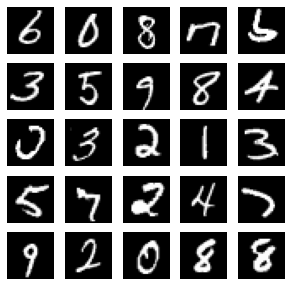

In [3]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [5]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [6]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [8]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [9]:
# network parameters
batch_size = 128
hidden_units = 500
dropout = 0.45

In [10]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 activation (Activation)     (None, 500)               0         
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 activation_1 (Activation)   (None, 500)               0         
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

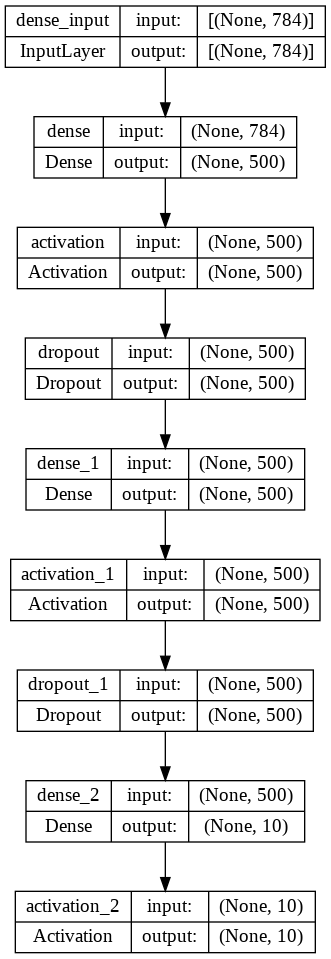

In [12]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [13]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
model_hist=model.fit(x_train, y_train, epochs=250, batch_size=batch_size)

Epoch 1/250
469/469 [==============================] - 5s 6ms/step - loss: 0.3274 - accuracy: 0.8994
Epoch 2/250
469/469 [==============================] - 3s 6ms/step - loss: 0.1483 - accuracy: 0.9549
Epoch 3/250
469/469 [==============================] - 3s 6ms/step - loss: 0.1140 - accuracy: 0.9649
Epoch 4/250
469/469 [==============================] - 3s 6ms/step - loss: 0.0945 - accuracy: 0.9701
Epoch 5/250
469/469 [==============================] - 2s 5ms/step - loss: 0.0818 - accuracy: 0.9746
Epoch 6/250
469/469 [==============================] - 2s 3ms/step - loss: 0.0751 - accuracy: 0.9758
Epoch 7/250
469/469 [==============================] - 2s 3ms/step - loss: 0.0712 - accuracy: 0.9773
Epoch 8/250
469/469 [==============================] - 2s 3ms/step - loss: 0.0629 - accuracy: 0.9799
Epoch 9/250
469/469 [==============================] - 2s 3ms/step - loss: 0.0614 - accuracy: 0.9805
Epoch 10/250
469/469 [==============================] - 2s 3ms/step - loss: 0.0554 - accura

In [15]:
print(model_hist.history.keys())

dict_keys(['loss', 'accuracy'])


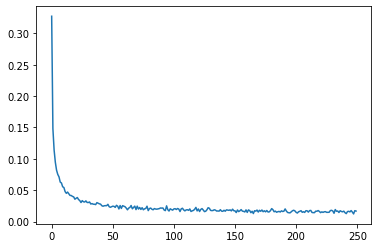

In [16]:
plt.plot(model_hist.history['loss'])

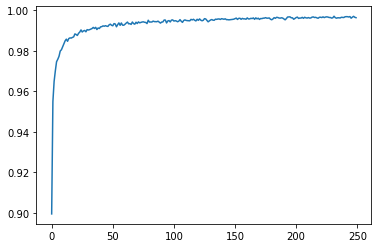

In [17]:
plt.plot(model_hist.history['accuracy'])

In [18]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 3ms/step - loss: 0.1257 - accuracy: 0.9863

Test accuracy: 98.6%


In [24]:
from keras.regularizers import l2
model = Sequential()
model.add(Dense(hidden_units,
                kernel_regularizer=l2(0.001),
                input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))


In [25]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
model_hist=model.fit(x_train, y_train, epochs=250, batch_size=batch_size)

Epoch 1/250
469/469 [==============================] - 2s 3ms/step - loss: 0.5813 - accuracy: 0.8980
Epoch 2/250
469/469 [==============================] - 2s 4ms/step - loss: 0.3124 - accuracy: 0.9482
Epoch 3/250
469/469 [==============================] - 2s 4ms/step - loss: 0.2637 - accuracy: 0.9543
Epoch 4/250
469/469 [==============================] - 2s 3ms/step - loss: 0.2427 - accuracy: 0.9591
Epoch 5/250
469/469 [==============================] - 2s 3ms/step - loss: 0.2358 - accuracy: 0.9604
Epoch 6/250
469/469 [==============================] - 2s 3ms/step - loss: 0.2318 - accuracy: 0.9602
Epoch 7/250
469/469 [==============================] - 2s 3ms/step - loss: 0.2237 - accuracy: 0.9621
Epoch 8/250
469/469 [==============================] - 2s 3ms/step - loss: 0.2187 - accuracy: 0.9631
Epoch 9/250
469/469 [==============================] - 2s 3ms/step - loss: 0.2226 - accuracy: 0.9633
Epoch 10/250
469/469 [==============================] - 2s 3ms/step - loss: 0.2147 - accura

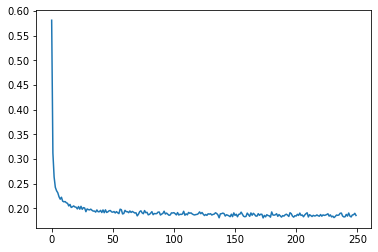

In [27]:
plt.plot(model_hist.history['loss'])

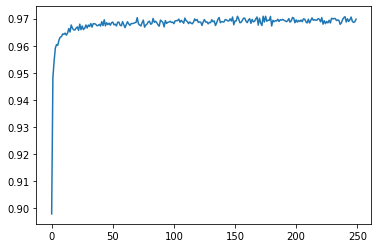

In [28]:
plt.plot(model_hist.history['accuracy'])

In [29]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 3ms/step - loss: 0.1450 - accuracy: 0.9826

Test accuracy: 98.3%
